# Regularization and Optimization in Neural Networks

## Regularization of NNs

Does regularization make sense in the context of neural networks? <br/>

Yes! We still have all of the salient ingredients: a loss function, overfitting vs. underfitting, and coefficients (weights) that could get too large.

But there are now a few different flavors besides L1 and L2 regularization. (Note that L1 regularization is not common in the context of  neural networks.)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
wine = pd.read_csv('wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
X = wine.drop('quality', axis=1)
y = wine.quality

In [4]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=11, stratify=y)
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train).astype(np.int32)
X_test_s = ss.transform(X_test).astype(np.int32)

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [ ]:
# y_train_c = to_categorical(y_train).astype(np.int32)
# y_test_c = to_categorical(y_test).astype(np.int32)

In [6]:
model = Sequential()

n_input = X_train_s.shape[1]

model.add(Dense(n_input, activation='relu'))
model.add(Dense(1))

In [7]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['acc'])

By the way, here is a helpful blog post that goes carefully through a list of similarly-named different activation functions and loss functions: https://gombru.github.io/2018/05/23/cross_entropy_loss/

In [8]:
history = model.fit(X_train_s, np.array(y_train),
                    validation_data=(X_test_s, np.array(y_test)),
                   epochs=30, batch_size=None)

Train on 4872 samples, validate on 1625 samples
Epoch 1/30
4872/4872 [==============================] - 1s 245us/step - loss: 22.3716 - acc: 0.0049 - val_loss: 16.1125 - val_acc: 0.0166
Epoch 2/30
4872/4872 [==============================] - 0s 73us/step - loss: 11.4240 - acc: 0.0593 - val_loss: 7.8764 - val_acc: 0.0911
Epoch 3/30
4872/4872 [==============================] - 0s 65us/step - loss: 5.5046 - acc: 0.1359 - val_loss: 3.9999 - val_acc: 0.1711
Epoch 4/30
4872/4872 [==============================] - 0s 61us/step - loss: 3.1617 - acc: 0.2338 - val_loss: 2.7206 - val_acc: 0.2548
Epoch 5/30
4872/4872 [==============================] - 0s 51us/step - loss: 2.3170 - acc: 0.2789 - val_loss: 2.1611 - val_acc: 0.2929
Epoch 6/30
4872/4872 [==============================] - 0s 79us/step - loss: 1.8593 - acc: 0.3101 - val_loss: 1.7724 - val_acc: 0.3132
Epoch 7/30
4872/4872 [==============================] - 0s 58us/step - loss: 1.5344 - acc: 0.3356 - val_loss: 1.4866 - val_acc: 0.3409
Epo

In [9]:
for layer in model.layers:
    print(layer.get_weights())

[array([[ 0.29570356,  0.4029405 ,  0.13234727, -0.15642022,  0.17036992,
        -0.22459559,  0.36353648, -0.01372498, -0.15741543, -0.39049953,
        -0.46696907,  0.278473  ],
       [ 0.15086879, -0.00110078, -0.0529059 , -0.06780171, -0.05738944,
         0.32296497, -0.57505965, -0.38440582, -0.4676018 , -0.27860835,
        -0.4360004 , -0.15055665],
       [ 0.28841433,  0.39182317, -0.02133318, -0.06594245,  0.12862344,
        -0.18425308, -0.42566147, -0.23289253,  0.62273276,  0.161406  ,
         0.08939992,  0.3092068 ],
       [-0.03424571,  0.36082178,  0.07973922,  0.11740685, -0.3845603 ,
         0.2380666 , -0.66829294,  0.27541053,  0.37787664,  0.1143884 ,
         0.5535567 ,  0.21106589],
       [-0.2334365 ,  0.354469  , -0.00866889,  0.21685298,  0.38671523,
         0.05343591,  0.18746814, -0.06734001, -0.15231249, -0.05959271,
         0.01441472, -0.09627475],
       [ 0.01811321,  0.3643815 ,  0.22547516, -0.06142164,  0.44280797,
         0.33695185, 

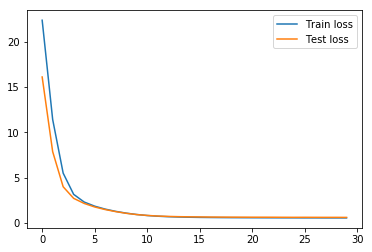

In [10]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();

In [11]:
sum(abs(np.array(model.predict(X_test_s).T) - np.array(y_test))[0])

989.6724996566772

## Adding Regularization

Here's a helpful review article on regularization techniques: https://towardsdatascience.com/regularization-in-machine-learning-connecting-the-dots-c6e030bfaddd

In [12]:
from keras import regularizers

In [13]:
model_r = Sequential()

n_input = X_train_s.shape[1]

model_r.add(Dense(n_input, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))
model_r.add(Dense(1,
                 kernel_regularizer=regularizers.l2(0.01)))

In [14]:
model_r.compile(optimizer='adam', loss='mean_squared_error')

history_r = model_r.fit(X_train_s, np.array(y_train),
                        validation_data=(X_test_s, np.array(y_test)),
                       epochs=42, batch_size=None)

Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 1s 115us/step - loss: 32.1915 - val_loss: 26.2275
Epoch 2/42
4872/4872 [==============================] - 0s 99us/step - loss: 20.3187 - val_loss: 14.5678
Epoch 3/42
4872/4872 [==============================] - ETA: 0s - loss: 10.46 - 0s 98us/step - loss: 10.1533 - val_loss: 6.5988
Epoch 4/42
4872/4872 [==============================] - 0s 76us/step - loss: 4.7192 - val_loss: 3.4323
Epoch 5/42
4872/4872 [==============================] - 0s 63us/step - loss: 2.8720 - val_loss: 2.4418
Epoch 6/42
4872/4872 [==============================] - 0s 63us/step - loss: 2.1677 - val_loss: 1.9554
Epoch 7/42
4872/4872 [==============================] - 0s 50us/step - loss: 1.7699 - val_loss: 1.6408
Epoch 8/42
4872/4872 [==============================] - 0s 61us/step - loss: 1.4945 - val_loss: 1.4047
Epoch 9/42
4872/4872 [==============================] - 0s 63us/step - loss: 1.2854 - val_loss: 1.

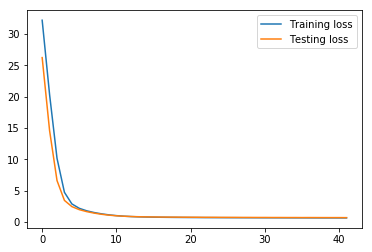

In [15]:
plt.plot(history_r.history['loss'], label='Training loss')
plt.plot(history_r.history['val_loss'], label='Testing loss')
plt.legend();

#### Examining Our Predictions

In [16]:
model_r.predict(X_test_s[:10]).round(2)

array([[5.59],
       [5.54],
       [4.77],
       [5.81],
       [5.  ],
       [5.83],
       [5.52],
       [4.94],
       [5.6 ],
       [5.89]], dtype=float32)

In [17]:
y_test[:10]

930     5
143     5
1037    5
4212    5
1032    5
5236    7
4651    7
4       5
1091    6
1536    6
Name: quality, dtype: int64

In [18]:
model_r.predict(X_test_s).T

array([[5.5850887, 5.5434613, 4.772732 , ..., 6.06506  , 5.131325 ,
        6.1560698]], dtype=float32)

In [19]:
(np.array(model_r.predict(X_test_s).T) - np.array(y_test))[0]

array([ 0.58508873,  0.54346132, -0.22726822, ...,  1.06506014,
        0.13132477,  0.15606976])

In [20]:
sum(abs(np.array(model_r.predict(X_test_s).T) - np.array(y_test))[0])

989.1040163040161

### Dropout

Here's a new regularization idea: Turn some neurons off during training. We'll assign probabilities of 'dropout' and then let fate decide.

$\rightarrow$ Why is this a good idea? *Is* it a good idea?

Was this sort of regularization available to us before? Why (not)?

In [21]:
from keras.layers import Dropout

In [22]:
model_d = Sequential()

n_input = X_train_s.shape[1]

model_d.add(Dense(n_input, activation='relu'))
model_d.add(Dropout(0.2))
model_d.add(Dense(1))

model_d.compile(optimizer='adam', loss='mean_squared_error')

history_d = model_d.fit(X_train_s, np.array(y_train),
                        validation_data=(X_test_s, np.array(y_test)),
                        epochs=42, batch_size=None)

Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 1s 122us/step - loss: 26.6295 - val_loss: 20.1045
Epoch 2/42
4872/4872 [==============================] - 0s 87us/step - loss: 15.6088 - val_loss: 10.8737
Epoch 3/42
4872/4872 [==============================] - 0s 58us/step - loss: 8.6416 - val_loss: 5.2876
Epoch 4/42
4872/4872 [==============================] - 0s 57us/step - loss: 5.0831 - val_loss: 2.8059
Epoch 5/42
4872/4872 [==============================] - 0s 55us/step - loss: 3.5966 - val_loss: 1.9460
Epoch 6/42
4872/4872 [==============================] - 0s 66us/step - loss: 3.1244 - val_loss: 1.5479
Epoch 7/42
4872/4872 [==============================] - 0s 57us/step - loss: 2.7483 - val_loss: 1.3109
Epoch 8/42
4872/4872 [==============================] - 0s 69us/step - loss: 2.5032 - val_loss: 1.1494
Epoch 9/42
4872/4872 [==============================] - 0s 56us/step - loss: 2.2752 - val_loss: 1.0154
Epoch 10/42
4872/487

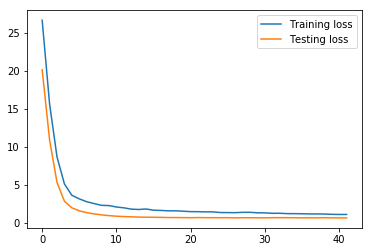

In [23]:
plt.plot(history_d.history['loss'], label='Training loss')
plt.plot(history_d.history['val_loss'], label='Testing loss')
plt.legend();

In [ ]:
# history_d.history['acc'][-1], history_d.history['val_acc'][-1]

In [24]:
sum(abs(np.array(model_d.predict(X_test_s).T) - np.array(y_test))[0])

993.9098806381226

### Early Stopping

Another idea is to try to terminate the training process early, even before some pre-specified number of epochs.

$\rightarrow$ Why is this a good idea? *Is* it a good idea?

Was this sort of regularization available to us before? Why (not)?

In [25]:
from keras.callbacks import EarlyStopping

In [26]:
model_es = Sequential()

n_input = X_train_s.shape[1]
n_hidden = n_input

model_es.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model_es.add(Dense(1))

model_es.compile(optimizer='adam', loss='mean_squared_error')

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-08, patience=0, verbose=1,
                           mode='auto')

callbacks_list = [early_stop]

history_es = model_es.fit(X_train_s, np.array(y_train),
                          validation_data=(X_test_s, np.array(y_test)),
                         epochs=40, batch_size=None, callbacks=callbacks_list)

Train on 4872 samples, validate on 1625 samples
Epoch 1/40
4872/4872 [==============================] - 1s 151us/step - loss: 29.0586 - val_loss: 23.2886
Epoch 2/40
4872/4872 [==============================] - 0s 65us/step - loss: 18.6966 - val_loss: 14.6689
Epoch 3/40
4872/4872 [==============================] - 0s 97us/step - loss: 10.5404 - val_loss: 6.9067
Epoch 4/40
4872/4872 [==============================] - 0s 73us/step - loss: 4.5927 - val_loss: 2.9722
Epoch 5/40
4872/4872 [==============================] - 0s 63us/step - loss: 2.3877 - val_loss: 1.9137
Epoch 6/40
4872/4872 [==============================] - 0s 54us/step - loss: 1.6720 - val_loss: 1.4791
Epoch 7/40
4872/4872 [==============================] - 0s 54us/step - loss: 1.3059 - val_loss: 1.2023
Epoch 8/40
4872/4872 [==============================] - 0s 55us/step - loss: 1.0723 - val_loss: 1.0323
Epoch 9/40
4872/4872 [==============================] - 0s 61us/step - loss: 0.9270 - val_loss: 0.9216
Epoch 10/40
4872/48

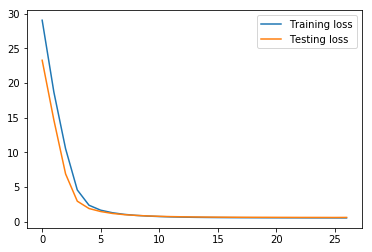

In [27]:
plt.plot(history_es.history['loss'], label='Training loss')
plt.plot(history_es.history['val_loss'], label='Testing loss')
plt.legend();

In [28]:
sum(abs(np.array(model_es.predict(X_test_s).T) - np.array(y_test))[0])

1007.0412740707397

## Exercise

Build your own network *with some sort of regularization built in* to predict digits using sklearn's `load_digits` dataset!

The imports you need are in the next cell.

Here are a couple hints and leading questions:

1. You'll need to use `to_categorical()` on your target. (What does this function do?)
2. What should your output layer look like? How many neurons should it have and what should your activation function be there?
3. When we compile this network, what loss function should we use?

In [29]:
from sklearn.datasets import load_digits
from keras.utils import to_categorical

In [30]:
data = load_digits()
print(data.data)
print(data.target)
print(data.DESCR)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form

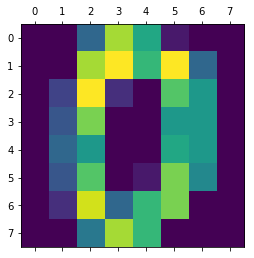

In [31]:
plt.matshow(data.images[0]);

In [56]:
X = data.data
y = to_categorical(data.target, num_classes=10)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    random_state=11, 
                                                    stratify=y)

In [59]:
X_train.shape[1]

64

In [61]:
model = Sequential()

n_input = X_train.shape[1]

model.add(Dense(n_input, input_dim=n_input, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [62]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [63]:
history = model.fit(X_train, np.array(y_train),
                    validation_data=(X_test, np.array(y_test)),
                   epochs=30, batch_size=None)

Train on 1347 samples, validate on 450 samples
Epoch 1/30
1347/1347 [==============================] - 1s 631us/step - loss: 5.4908 - acc: 0.2673 - val_loss: 1.8856 - val_acc: 0.5133
Epoch 2/30
1347/1347 [==============================] - 0s 106us/step - loss: 1.0897 - acc: 0.7283 - val_loss: 0.7338 - val_acc: 0.8333
Epoch 3/30
1347/1347 [==============================] - 0s 84us/step - loss: 0.5262 - acc: 0.8664 - val_loss: 0.4357 - val_acc: 0.8733
Epoch 4/30
1347/1347 [==============================] - 0s 100us/step - loss: 0.3174 - acc: 0.9020 - val_loss: 0.3014 - val_acc: 0.9067
Epoch 5/30
1347/1347 [==============================] - 0s 174us/step - loss: 0.2282 - acc: 0.9243 - val_loss: 0.2355 - val_acc: 0.9267
Epoch 6/30
1347/1347 [==============================] - 0s 97us/step - loss: 0.1788 - acc: 0.9480 - val_loss: 0.2054 - val_acc: 0.9356
Epoch 7/30
1347/1347 [==============================] - 0s 82us/step - loss: 0.1416 - acc: 0.9569 - val_loss: 0.1725 - val_acc: 0.9378
Epoc